In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
labels = pd.read_csv('train_labels.csv',low_memory=False)
values = pd.read_csv('train_values.csv',low_memory=False, dtype= {
'geo_level_1_id':'uint8', 'geo_level_2_id':'uint16', 'geo_level_3_id':'uint16', 'count_floors_pre_eq':'uint8','age':'uint16', 'area_percentage':'uint16', 'height_percentage':'uint16', 
'land_surface_condition':'category', 'foundation_type':'category', 'roof_type':'category', 'ground_floor_type':'category', 'other_floor_type':'category', 'position':'category','plan_configuration':'category', 
'has_superstructure_adobe_mud':'bool', 'has_superstructure_mud_mortar_stone':'bool','has_superstructure_stone_flag':'bool', 'has_superstructure_cement_mortar_stone':'bool', 'has_superstructure_mud_mortar_brick':'bool', 'has_superstructure_cement_mortar_brick':'bool', 'has_superstructure_timber':'bool', 'has_superstructure_bamboo':'bool', 'has_superstructure_rc_non_engineered':'bool', 'has_superstructure_rc_engineered':'bool', 'has_superstructure_other':'bool', 
'legal_ownership_status':'category', 'count_families':'uint16', 
'has_secondary_use':'bool', 'has_secondary_use_agriculture':'bool', 'has_secondary_use_hotel':'bool', 'has_secondary_use_rental':'bool', 'has_secondary_use_institution':'bool', 'has_secondary_use_school':'bool', 'has_secondary_use_industry':'bool', 'has_secondary_use_health_post':'bool', 'has_secondary_use_gov_office':'bool', 'has_secondary_use_use_police':'bool', 'has_secondary_use_other':'bool',})

In [11]:
escuelas = values[values['has_secondary_use_school'] == True]
escuelas = escuelas['has_secondary_use_school'].value_counts()\
        .to_frame().reset_index()\
        .rename(columns = {'index':'escuelas','has_secondary_use_school':'total'})
escuelas

,escuelas,total
0,True,94


In [28]:
escuelasAge = values[values['has_secondary_use_school'] == True]
escuelasAge = values.groupby(['age']).agg({'has_secondary_use_school':'sum'})\
.rename(columns = {'has_secondary_use_school':'Total escuelas dañadas'})
escuelasAge.head(10)

,Total escuelas dañadas
age,
0,8.0
5,31.0
10,19.0
15,7.0
20,18.0
25,6.0
30,0.0
35,0.0
40,1.0


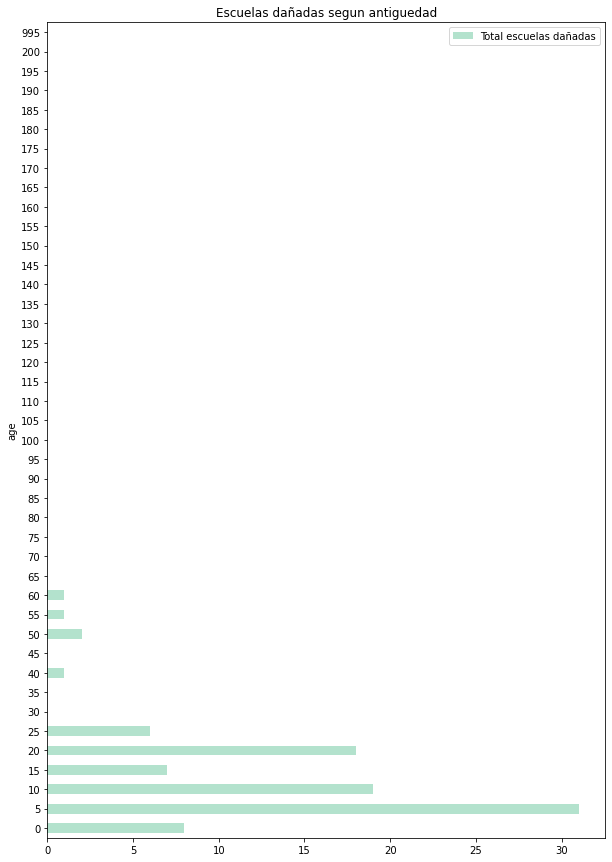

In [13]:
escuelasAge.plot.barh(stacked = True, colormap='Pastel2', \
                      title='Escuelas dañadas segun antiguedad',figsize =(10,15))

In [ ]:
#Conclusión: La mayoría de las escuelas dañadas tienen una antiguedad de 5 años (31 escuelas) 
#y 10 años (19 escuelas), del total de 94 escuelas dañadas.

In [23]:
configEscuelas = values[values['has_secondary_use_school'] == True]
configEscuelas = configEscuelas.groupby(['plan_configuration']).agg({'plan_configuration':'count'})\
.rename(columns = {'plan_configuration': 'total'})
configEscuelas.head(10)

,total
plan_configuration,
a,0
c,4
d,78
f,0
m,1
n,0
o,2
q,3
s,0


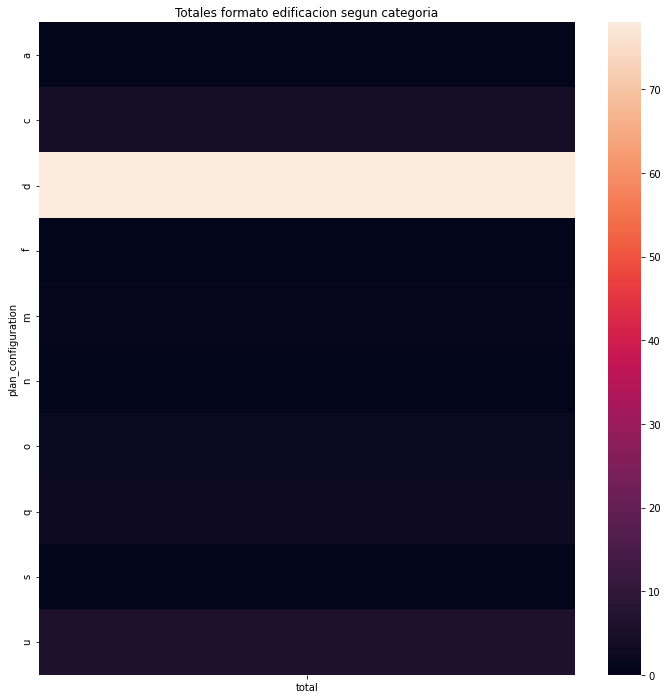

In [24]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Totales formato edificacion segun categoria')
sns.heatmap(configEscuelas, ax = ax)

In [ ]:
#Conclusión: La mayor cantidad de escuelas dañadas pertenece a la categoría 'd' respecto al diseño sísmico.

In [29]:
agric = values[values['has_secondary_use_agriculture'] == True]
agric = agric['has_secondary_use_agriculture'].value_counts()\
        .to_frame().reset_index()\
        .rename(columns = {'index':'agricultura','has_secondary_use_agriculture':'total'})
agric

,agricultura,total
0,True,16777


In [20]:
agricultura = values[values['has_secondary_use_agriculture'] == True]
agricultura = values.groupby(['age']).agg({'has_secondary_use_agriculture':'sum'})\
.rename(columns = {'has_secondary_use_agriculture':'Total puestos agricultura dañados'})
agricultura.head(10)

,Total puestos agricultura dañados
age,
0,1364.0
5,2079.0
10,2532.0
15,2365.0
20,2122.0
25,1624.0
30,1240.0
35,741.0
40,756.0


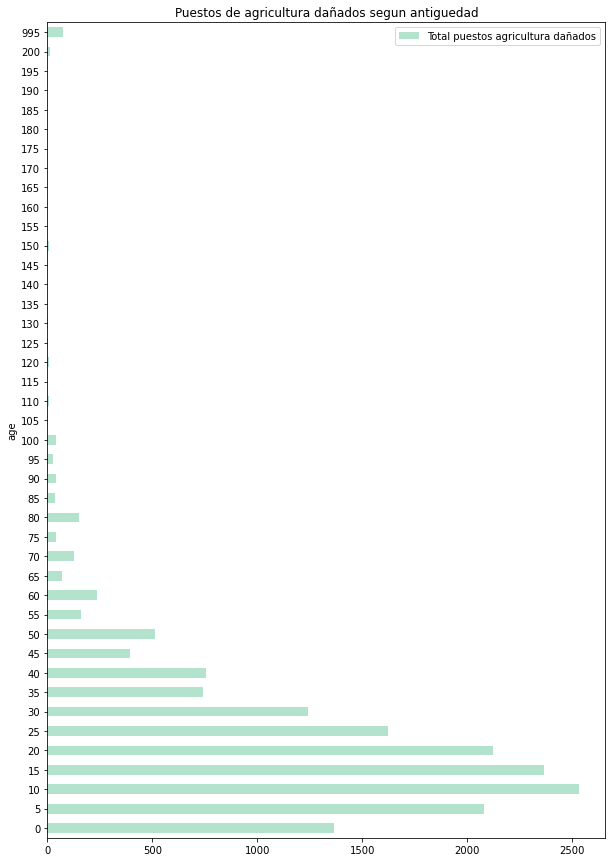

In [21]:
agricultura.plot.barh(stacked = True, colormap='Pastel2', title='Puestos de agricultura dañados segun antiguedad',\
                       figsize =(10,15))

In [ ]:
#Conclusión: La mayoría de los puestos de agricultura dañados tienen una antiguedad de 10 años (2532 puestos) 
#y 15 años (2365 puestos), del total de 16777 centros dañados.

In [25]:
configAgric = values[values['has_secondary_use_agriculture'] == True]
configAgric = configAgric.groupby(['plan_configuration']).agg({'plan_configuration':'count'})\
.rename(columns = {'plan_configuration': 'total'})
configAgric.head(10)

,total
plan_configuration,
a,10
c,13
d,16319
f,1
m,0
n,2
o,7
q,233
s,16


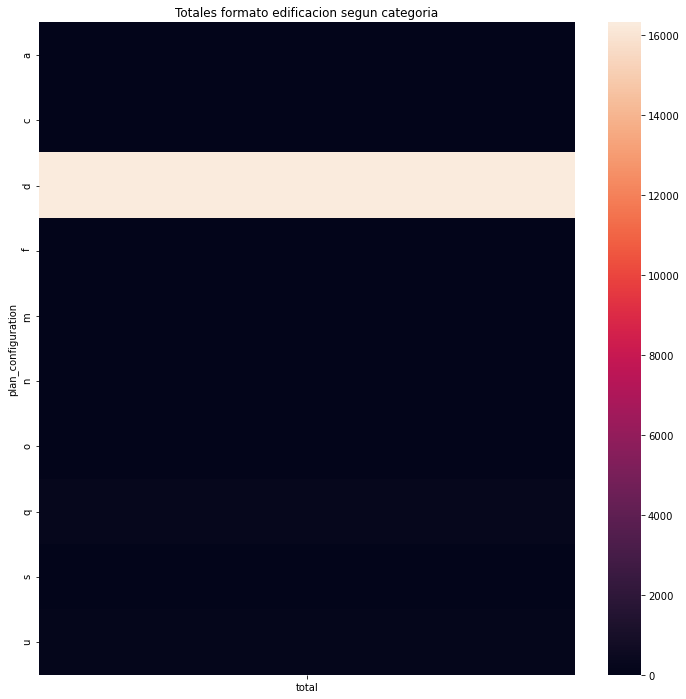

In [26]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Totales formato edificacion segun categoria')
sns.heatmap(configAgric, ax = ax)

In [ ]:
#Conclusión: La mayor cantidad de puestos de agricultura dañados pertenece a la categoría 'd' 
#respecto al diseño sísmico.

In [27]:
centrosSalud = values[values['has_secondary_use_health_post'] == True]
centrosSalud = values.groupby(['age']).agg({'has_secondary_use_health_post':'sum'})\
.rename(columns = {'has_secondary_use_health_post':'Total centros de salud dañados'})
centrosSalud.head(10)

,Total centros de salud dañados
age,
0,10.0
5,8.0
10,11.0
15,6.0
20,6.0
25,1.0
30,1.0
35,2.0
40,0.0


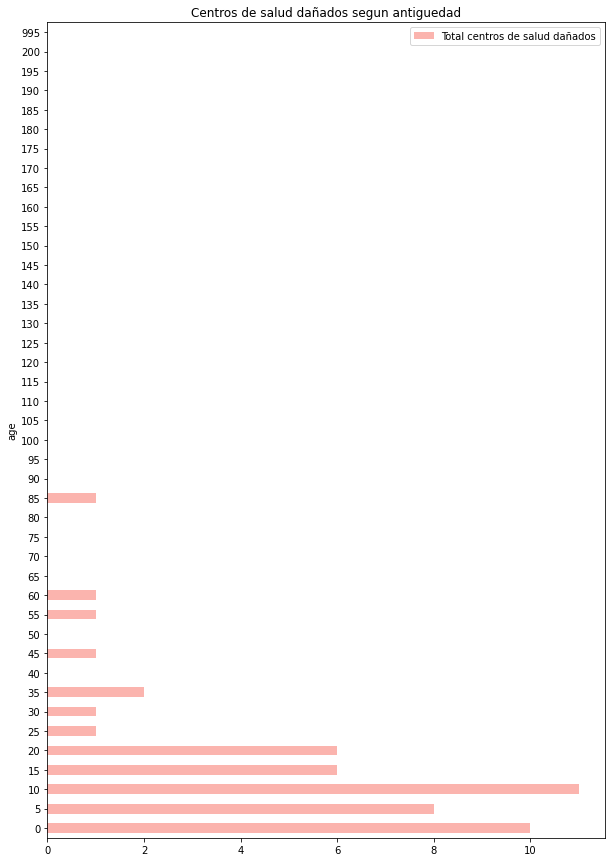

In [115]:
centrosSalud.plot.barh(stacked = True, colormap='Pastel1', title='Centros de salud dañados segun antiguedad',\
                       figsize =(10,15))

In [ ]:
#Conclusión: La mayoría de los centros de salud dañados tienen una antiguedad de 10 años (11 centros) 
#y 0 años (10 centros), del total de 49 centros de salud dañados.

In [40]:
casasTotales = values[values['has_secondary_use'] == False]
casasTotales = casasTotales['has_secondary_use'].value_counts()\
        .to_frame().reset_index()\
        .rename(columns = {'index':'uso secundario','has_secondary_use_school':'total'})
casasTotales

,uso secundario,has_secondary_use
0,False,231445


In [32]:
casas = values[values['has_secondary_use'] == False]
casas = values.groupby(['age']).agg({'has_secondary_use':'sum'})\
.rename(columns = {'has_secondary_use':'Total casas dañadas'})
casas = casas.sort_values('Total casas dañadas', ascending = False)
casas.head(20)

,Total casas dañadas
age,
10,4624.0
5,4592.0
15,3941.0
20,3396.0
0,3296.0
25,2372.0
30,1869.0
35,1107.0
40,1067.0


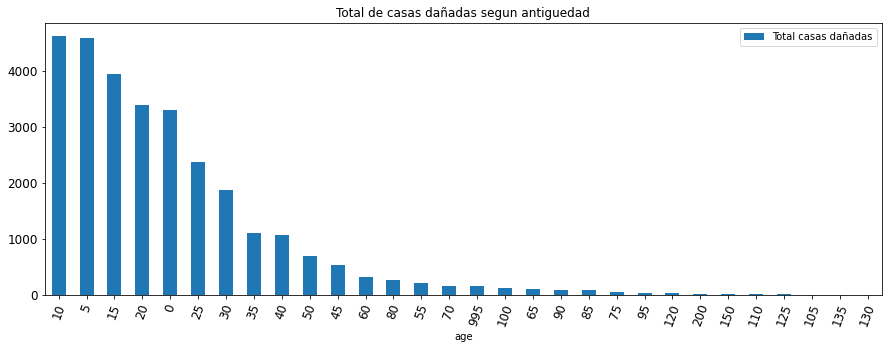

In [31]:
casas.head(30).plot(kind='bar', figsize=(15, 5), rot=70, title="Total de casas dañadas segun antiguedad", fontsize =12);

In [ ]:
#Conclusión: La mayoría de las casas dañadas tienen una antiguedad de 10 años (4624 casas) 
#y 5 años (4592 casas), del total de 231445 casas dañadas.

In [31]:
casas = values[values['has_secondary_use'] == False]
casas = casas[casas['age'] == 10]
configCasas = casas.groupby(['plan_configuration']).agg({'plan_configuration':'count'})\
.rename(columns = {'plan_configuration': 'total'})
configCasas.head(10)

,total
plan_configuration,
a,26
c,28
d,32871
f,4
m,2
n,2
o,17
q,811
s,49


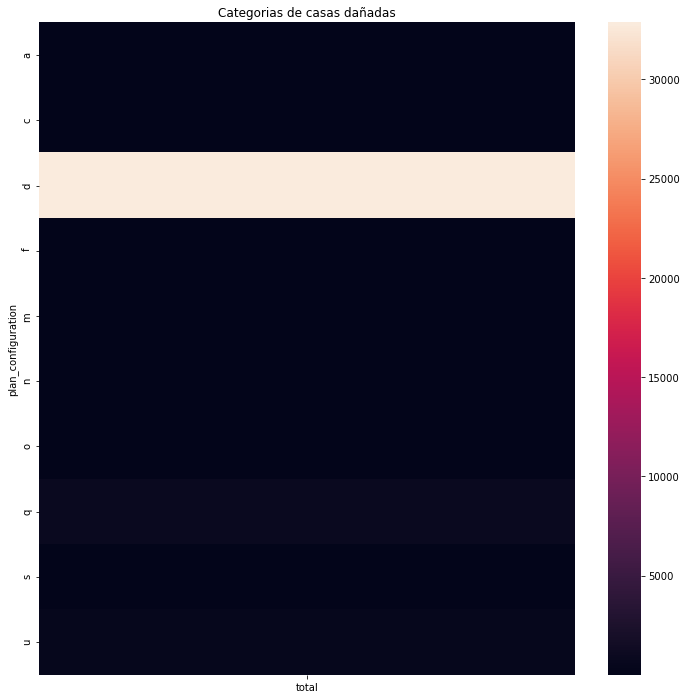

In [33]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Categorias de casas dañadas')
sns.heatmap(configCasas, ax = ax)

In [ ]:
#Conclusión: La mayoría de las casas dañadas pertenecen a la categoría 'd' respecto al diseño sísmico.

In [2]:
cantFamilias = values[['building_id', 'age', 'area_percentage', 'count_families']]\
.merge(labels, on = 'building_id')
cantFamilias.head(10)

,building_id,age,area_percentage,count_families,damage_grade
0,802906,30,6,1,3
1,28830,10,8,1,2
2,94947,10,5,1,3
3,590882,10,6,1,2
4,201944,30,8,1,3
5,333020,10,9,1,2
6,728451,25,3,1,3
7,475515,0,8,1,1
8,441126,15,8,1,2
9,989500,0,13,1,1


In [3]:
cantFamilias = cantFamilias.groupby(['count_families'])\
.agg({'building_id': 'count'}).reset_index().rename(columns = {'building_id': 'cantidad edificios'})
cantFamilias.head(10)

,count_families,cantidad edificios
0,0,20862
1,1,226115
2,2,11294
3,3,1802
4,4,389
5,5,104
6,6,22
7,7,7
8,8,2
9,9,4


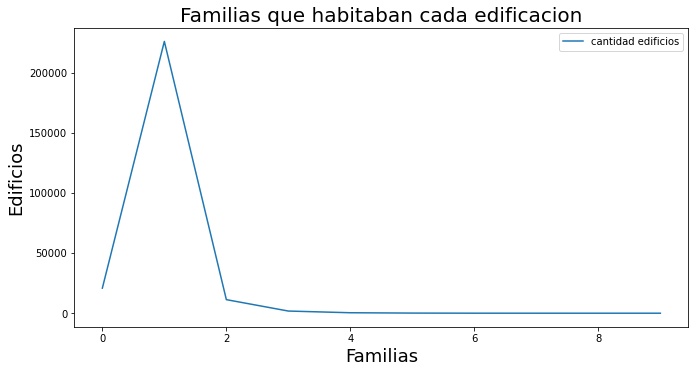

In [4]:
cantFamilias.plot(kind='line', x='count_families', y='cantidad edificios',figsize=(11,5.5))
g=plt.gca()
g.set_title("Familias que habitaban cada edificacion",\
            fontsize=20);
g.set_xlabel("Familias", fontsize=18);
g.set_ylabel("Edificios", fontsize=18);

In [ ]:
#Conclusión: En la mayoría de las edificaciones dañadas vivía sólo 1 familia (226115 edificaciones).

In [3]:
fliasEnArea = values[['building_id', 'count_families', 'area_percentage']]
fliasEnArea.head(10)

,building_id,count_families,area_percentage
0,802906,1,6
1,28830,1,8
2,94947,1,5
3,590882,1,6
4,201944,1,8
5,333020,1,9
6,728451,1,3
7,475515,1,8
8,441126,1,8
9,989500,1,13


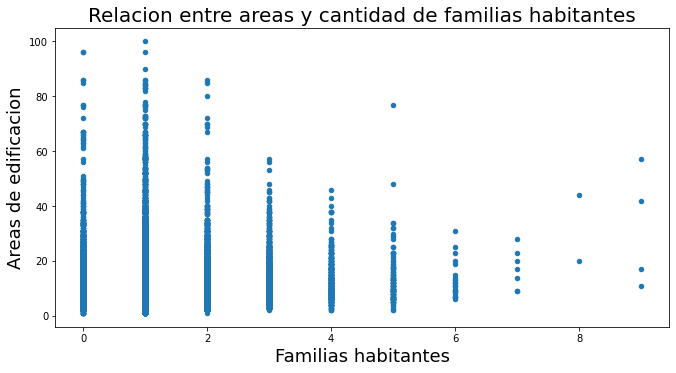

In [7]:
fliasEnArea.plot(kind='scatter', x='count_families', y='area_percentage',figsize=(11,5.5))
g=plt.gca()
g.set_title("Relacion entre areas y cantidad de familias habitantes",\
            fontsize=20);
g.set_xlabel("Familias habitantes", fontsize=18);
g.set_ylabel("Areas de edificacion", fontsize=18);